In [1]:
%matplotlib inline


# Plotting Regression Forest Error Bars


This example demonstrates using `forestci` to calculate the error bars of
the predictions of a :class:`sklearn.ensemble.RandomForestRegressor` object.

The data used here are a classical machine learning data-set, describing
various features of different cars, and their MPG.


/home/pzhao28/anaconda3/lib/python3.7/site-packages/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name autompg exist. Versions may be fundamentally different, returning version 1.
  if len(res) > 1:


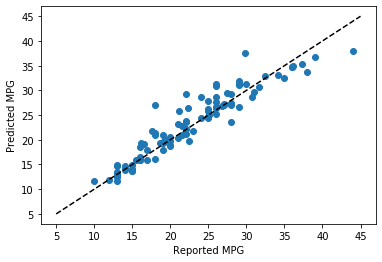

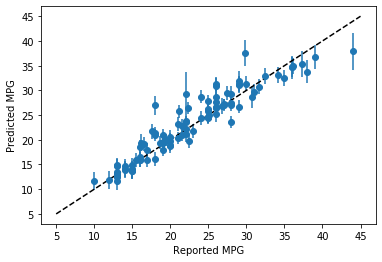

In [17]:
# Regression Forest Example
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as xval
from sklearn.datasets import fetch_openml
import forestci as fci

# retreive mpg data from machine learning library
mpg_data = fetch_openml('autompg')

# separate mpg data into predictors and outcome variable
mpg_X = mpg_data["data"]
mpg_y = mpg_data["target"]

# remove rows where the data is nan
not_null_sel = np.invert(
    np.sum(np.isnan(mpg_data["data"]), axis=1).astype(bool))
mpg_X = mpg_X[not_null_sel]
mpg_y = mpg_y[not_null_sel]

# split mpg data into training and test set
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(mpg_X, mpg_y,
                                                                         test_size=0.25,
                                                                         random_state=42)

# Create RandomForestRegressor
n_trees = 2000
mpg_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
mpg_forest.fit(mpg_X_train, mpg_y_train)
mpg_y_hat = mpg_forest.predict(mpg_X_test)

# Plot predicted MPG without error bars
plt.scatter(mpg_y_test, mpg_y_hat)
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Calculate the variance
mpg_V_IJ_unbiased = fci.random_forest_error(mpg_forest, mpg_X_train,
                                            mpg_X_test)

# Plot error bars for predicted MPG using unbiased variance
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()

In [4]:
mpg_X

array([[  0. , 307. , 130. , ...,  12. ,   0. ,   0. ],
       [  0. , 350. , 165. , ...,  11.5,   0. ,   0. ],
       [  0. , 318. , 150. , ...,  11. ,   0. ,   0. ],
       ...,
       [  1. , 135. ,  84. , ...,  11.6,  12. ,   0. ],
       [  1. , 120. ,  79. , ...,  18.6,  12. ,   0. ],
       [  1. , 119. ,  82. , ...,  19.4,  12. ,   0. ]])

In [6]:
mpg_y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [8]:
type(mpg_data)

sklearn.utils.Bunch

In [9]:
# GBM quantile regression example

In [16]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init() 
train = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv")
splits = train.split_frame(ratios=[0.75], seed=1234)
gbm = H2OGradientBoostingEstimator(distribution="quantile", quantile_alpha=0.9)
gbm.train(x=[0,1,2], y="petal_len", training_frame=splits[0])
print(gbm.predict(splits[1]))

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 7 hours 16 mins
H2O_cluster_timezone:,America/Phoenix
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_pzhao28_1whpm1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.833 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
1.84891
1.93236
4.29164
1.79391
4.11237
1.79391
3.0195
1.79391
1.85813
1.77468


In [18]:
mpg_V_IJ_unbiased

array([ 1.89246631,  2.13648518,  2.31834655,  2.59396674,  1.44466124,
        1.59578902,  3.1938111 ,  2.73455661,  1.52997322,  3.9059038 ,
        2.60809975,  1.37701929,  2.26150241,  1.67799812,  2.79199712,
        3.00940142,  1.8928564 ,  2.57814231,  1.82345637,  2.51067377,
        2.22677178, 13.64523326,  2.82788666,  2.14154672,  2.18540642,
        2.94319281,  1.54291483,  1.5750902 ,  6.3206139 ,  1.38674263,
        2.1551011 ,  1.40257479,  2.224638  ,  2.25836918,  2.63745711,
        5.08199377,  2.47670897,  1.49255468,  2.22798648,  3.45874109,
        2.10028572,  1.75816775,  3.93410701,  1.46237621,  2.23510473,
        3.36177837,  1.60690694,  6.83071025,  1.92489128,  2.49024009,
        2.69823963,  1.92803899,  1.49780347,  5.28550186, 18.91408498,
        2.16002488,  2.28870035,  1.57247362,  1.35091176,  1.54935627,
        3.10766455,  1.54380209,  2.56383585,  1.87193845,  1.67592727,
        1.51835774,  1.41878249,  2.57951726,  2.13618384,  2.89